**Nombre:** Norma de los Ángeles García López

**Matrícula**: A01228278

**Materia:** Ciencia y Analítica de Datos

**Profesor:** Dra. María de la Paz Rico

**Fecha:** Jueves 27 Octubre 2022

Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [4]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B=W*D*Winv
WD=np.dot(W,D)
B_recons=np.dot(WD,Winv).round(2) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[ 1.80558242e+00  0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00 -2.41260114e-02 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -2.17279621e-16]]
-----------------------------


In [5]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [8]:
#Matriz 1

# En este punto se declara la primera matriz
B1=array([[3,0,2],[3,0,-2],[0,1,1]])

print('\nMatriz B2 original\n')
print(B1)

# Se obtienen los valores de eigendescomposición

values1, vectors1 = eig(B1)

print('\nValues vs Vectors\n')
print(values1)
print(vectors1)

# A partir de esta línea se hace la reconstrucción
values1, vectors1 = np.linalg.eig(B1)

W1 = vectors1.round(2)
W1inv = np.linalg.inv(W1)
D1 = np.diag(values1)

WD1 = np.dot(W1,D1)

B1_recons= np.dot(WD1,W1inv).round(0)

print('\nMatriz B1 reconstruida\n')
print(B1_recons)





Matriz B2 original

[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]

Values vs Vectors

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]

Matriz B1 reconstruida

[[ 3.+0.j  0.-0.j  2.+0.j]
 [ 3.-0.j  0.+0.j -2.-0.j]
 [-0.+0.j  1.-0.j  1.-0.j]]


In [9]:
#Matriz 

#Matriz 2

# En este punto se declara la primera matriz
B2=array([[1,3,8],[2,0,0],[0,0,1]])

print('\nMatriz B2 original\n')
print(B2)

# Se obtienen los valores de eigendescomposición

values2, vectors2 = eig(B2)

print('\nValues vs Vectors\n')
print(values2)
print(vectors2)

# A partir de esta línea se hace la reconstrucción
values2, vectors2 = np.linalg.eig(B2)

W2 = vectors2.round(2)
W2inv = np.linalg.inv(W2)
D2 = np.diag(values2)

WD2 = np.dot(W2,D2)

B2_recons= np.dot(WD2,W2inv).round(0)

print('\nMatriz B2 reconstruida\n')
print(B2_recons)


Matriz B2 original

[[1 3 8]
 [2 0 0]
 [0 0 1]]

Values vs Vectors

[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]

Matriz B2 reconstruida

[[ 1.  3.  8.]
 [ 2. -0. -0.]
 [ 0.  0.  1.]]


In [11]:
#Matriz 3

#Matriz 3

# En este punto se declara la primera matriz
B3 = array([[5,4,0],[1,0,1],[10,7,1]])

print('\nMatriz B3 original\n')
print(B3)

# Se obtienen los valores de eigendescomposición

values3, vectors3 = eig(B3)

print('\nValues vs Vectors\n')
print(values3)
print(vectors3)

# A partir de esta línea se hace la reconstrucción
values3, vectors3 = np.linalg.eig(B3)

W3 = vectors3.round(2)
W3inv = np.linalg.inv(W3)
D3 = np.diag(values3)

WD3 = np.dot(W3,D3)

B3_recons= np.dot(WD3,W3inv).round(0)

print('\nMatriz B3 reconstruida\n')
print(B3_recons)



Matriz B3 original

[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]

Values vs Vectors

[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]

Matriz B3 reconstruida

[[ 5.  4. -0.]
 [ 1.  0.  1.]
 [10.  7.  1.]]


**Comentario relacionado al ejercicio** - Personalmente encontramos muy interesante el tema de la reconstrucción, y cómo los decimales si afectan al momento de hacer los cálculos. Después de hacer algunas iteraciones, encontramos que para este ejercicio en particular, poner .round(2) en el vector W y poner .round(0) en el vector B reconstruido nos regresaba exactamente la misma matriz que la original. Si redondeábamos la reconstrucción o el original con más o menos decimales (dependiendo el caso), el resultado final variaba ligeramente.

**Comentario relacionado a PCA** - Sabemos que para que un modelo funcione bien, en general, siempre será más beneficioso que cuanta más y mejor información, obtengamos una predicción más acertada. Pero también empezaremos a notar que la ejecución del mismo empezará a tomar más tiempo y recursos. Es muy probable que algunas de las variables sean menos importantes y no aporten demasiado valor a la predicción y también podríamos causar overfitting al modelo. Es ahí cuando PCA trae beneficios al Machine Learning al aplicar reducción de dimensiones al quitar variables, y perder un porcentaje reducido de información en el proceso. Finalmente, es importante decir que PCA es importante usarlo cuando sabemos que las variables iniciales están correlacionadas. Si sabemos que estas variables de inicio no tienen correlación, entonces no tiene sentido usar PCA.

**¿Qué significa reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir: Unidades-PC PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.

Para ello usaremos Singular Value Descomposition (SVD).

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


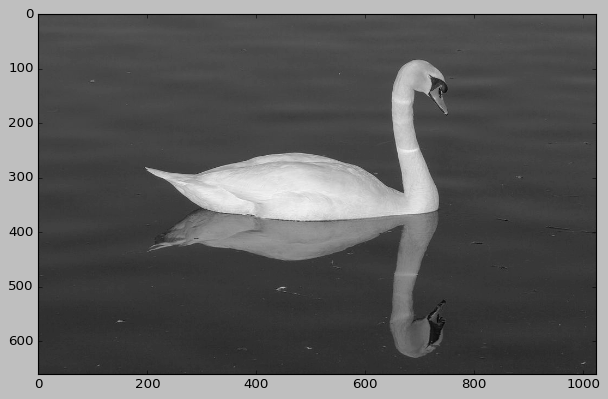

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F10C0388190>


In [12]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [13]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

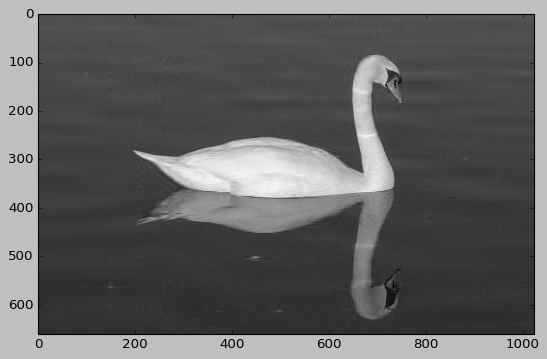

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[234. 234. 234. ... 234. 234. 234.]


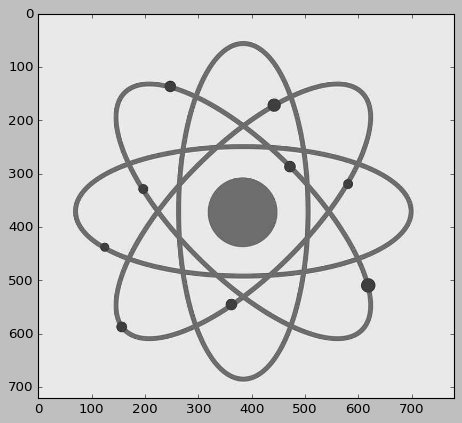

<PIL.Image.Image image mode=LA size=780x720 at 0x7F10B546A990>


In [17]:
#imagen 1
plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2021/03/atomo.jpg')).convert('LA')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)

In [18]:
# En este punto, se hace la descomposición por SVD (Single Value Decomposition)

a1,b1,c1 = np.linalg.svd(imgmat1)
print(imgmat1.shape)

print(a1.shape)
print(b1.shape)
print(c1.shape)

(720, 780)
(720, 720)
(720,)
(780, 780)


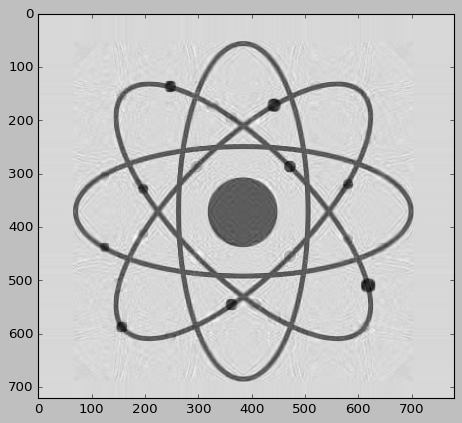

Felicidades la imagen está comprimida


In [19]:
##Los valores van de 0-780

nvalue1 = 45



# En esta línea se hace una reconstrucción de la imagen original con base en el nvalue, mientras mayor sea,
# mayor será la calidad de la reconstrucción, siempre y cuando no sobre pase el tamaño original de la foto

#------------------------------
reconstimg1 = np.matrix(a1[:,:nvalue1])*np.diag(b1[:nvalue1])*np.matrix(c1[:nvalue1,:])
#ve las dimensiones de la imagen y su descomposicion
#400x400= a1(400x400)b1(400)c1(400)
        #=a1(400Xnvalue2)b1(nvalue2Xnvalue2)c1(nvalue2x400)

      
plt.imshow(reconstimg1,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[104. 104. 104. ... 106. 127. 152.]


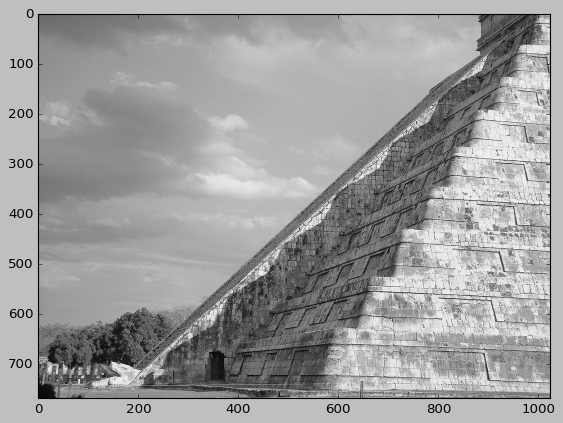

<PIL.Image.Image image mode=LA size=780x720 at 0x7F10B546A990>


In [26]:
#imagen 2

plt.style.use('classic')
img2 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2017/02/Chichen-Itza.jpg')).convert('LA')
imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img1)

In [37]:
# En este punto, se hace la descomposición por SVD (Single Value Decomposition)

a2,b2,c2 = np.linalg.svd(imgmat2)
print(imgmat2.shape)

print(a2.shape)
print(b2.shape)
print(c2.shape)

(768, 1024)
(768, 768)
(768,)
(1024, 1024)


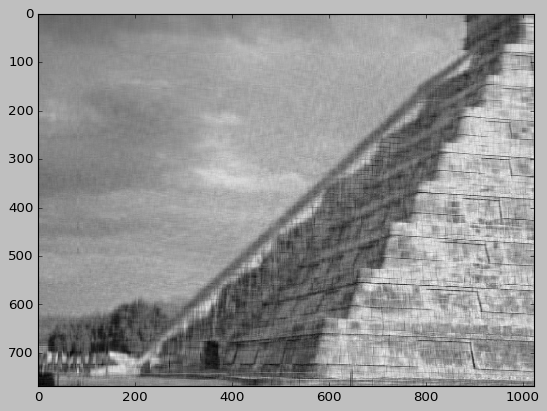

Felicidades la imagen está comprimida


In [40]:
##Los valores van de 0-1024

nvalue2 = 45



# En esta línea se hace una reconstrucción de la imagen original con base en el nvalue, mientras mayor sea,
# mayor será la calidad de la reconstrucción, siempre y cuando no sobre pase el tamaño original de la foto

#------------------------------
reconstimg2 = np.matrix(a2[:,:nvalue2])*np.diag(b2[:nvalue2])*np.matrix(c2[:nvalue2,:])
#ve las dimensiones de la imagen y su descomposicion
#400x400= a1(1024x1024)b1(1024)c1(1024)
        #=a1(1024Xnvalue2)b1(nvalue2Xnvalue2)c1(nvalue2x400)

      
plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[255. 255. 255. ... 255. 255. 255.]


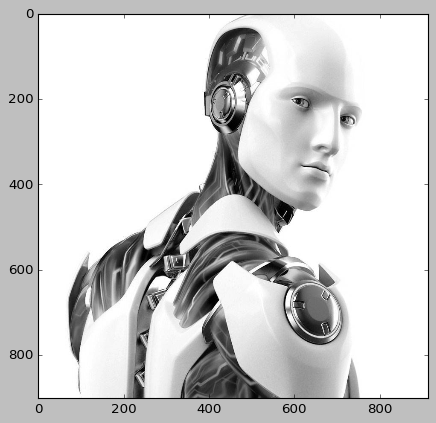

<PIL.Image.Image image mode=LA size=914x900 at 0x7F10AC8A6F50>


In [41]:
#imagen 3

plt.style.use('classic')
img3 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2017/06/rebelion-robots.jpg')).convert('LA')
imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img3)

In [30]:

a3,b3,c3 = np.linalg.svd(imgmat3)
print(imgmat3.shape)

print(a3.shape)
print(b3.shape)
print(c3.shape)

(900, 914)
(900, 900)
(900,)
(914, 914)


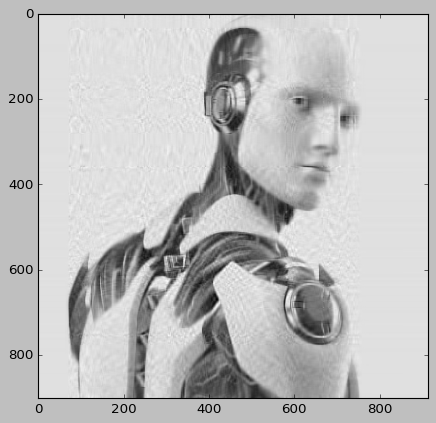

Felicidades la imagen está comprimida


In [42]:
##Los valores van de 0-914

nvalue3 = 45



# En esta línea se hace una reconstrucción de la imagen original con base en el nvalue, mientras mayor sea,
# mayor será la calidad de la reconstrucción, siempre y cuando no sobre pase el tamaño original de la foto

#------------------------------
reconstimg3 = np.matrix(a3[:,:nvalue3])*np.diag(b3[:nvalue3])*np.matrix(c3[:nvalue3,:])
#ve las dimensiones de la imagen y su descomposicion


      
plt.imshow(reconstimg3,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")


**Comentario relacionado al ejercicio:** - El tema de la compresión de imágenes es muy importante en el día a día para poder hacer análisis eficaces sin utilizar mucha información. Personalmente encontramos muy impresionante cómo se puede rescatar un muy buen valor de la imagen al jugar con valor pequeños de nvalue. Se hizo el ejercicio con distintas complejidades de imágenes, y en general, un valor de nvalue entre el 5 y 20% nos daba una idea muy buena de la imagen original, lo cual al final ahorra mucha información y espacio para crear modelos de clasificación o reconstrucción.

**Comentario relacionado a SVD**: - El método SVD también se aplica al estudio de problemas lineales inversos y es útil en el análisis de métodos de regularización. Es ampliamente utilizado en estadística, donde se relaciona con el análisis de componentes principales y el análisis de correspondencia. Personalmente somos ingeniero en electrónica y telecomunicaciones y actuaria, y hemos visto como también SVD se utiliza para el procesamiento de señales y reconocimiento de patrones. Finalmente, otro caso de uso interesante es el de la indexación semántica en el procesamiento de texto en lenguaje natural.


# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [46]:
#tu codigo aqui

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
# Cargamos la información
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estima dos componentes de PCA
X_n = pca.fit_transform(X) # pone la info original en el plano de PCA

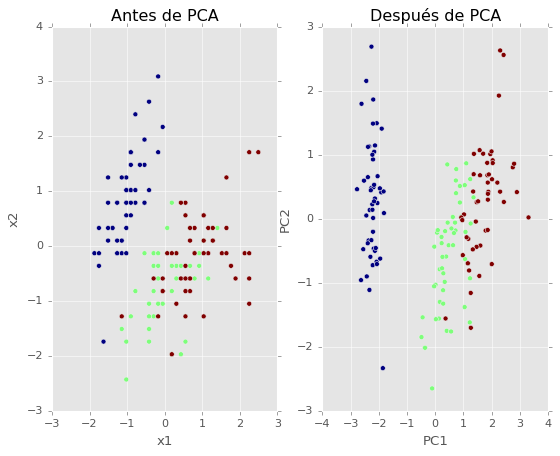

In [47]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Antes de PCA')
axes[1].scatter(X_n[:,0], X_n[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Después de PCA')
plt.show()

In [45]:
# Podemos ver que en la gráfica PCA, la varianza se maximiza a lo largo de PC1 (explica el 73 % de la varianza)
# y PC2 (explica el 22 % de la varianza). Juntos, explican el 95%.

print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [48]:
np.cov(X_n.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [49]:
# La prueba de máxima varianza también se puede ver estimando la matriz de covarianza del espacio reducido. 
# Observamos que estos valores (en la diagonal tenemos las varianzas) son iguales a los valores propios 
# reales de la covarianza almacenada en pca.explained_variance_, como se detalla abajo:

pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [50]:
# La importancia de cada componente se refleja en la magnitud de los valores correspondientes en
# los vectores propios (mayor magnitud, mayor importancia). A continuación los componentes más importantes,
# que ya sabíamos por el código inicial que serían solamente 2

# Mirando el PC1 (primer componente principal) que es la primera fila ,podemos concluir que 
# las características 1, 3 y 4 son las más importantes para PC1. 
# De manera similar, podemos afirmar que la característica 2 y luego la 1 son las más importantes para PC2.


print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [51]:
# El biplot es la mejor manera de visualizar todo en uno después de un análisis PCA. Dado que no existe una 
# predefinida en Python, se procede a crear una función especial para lo mismo

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

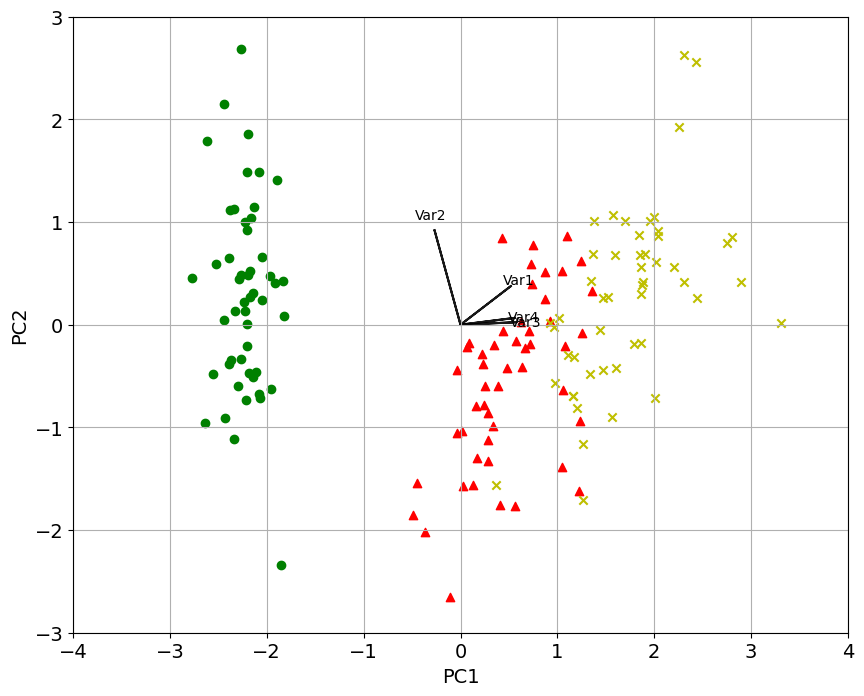

In [52]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 

# Se llama la función con 2 componentes de PCA
biplot(X_n[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [53]:
# Podemos verificar visualmente que a) la varianza está maximizada y 
# b) que las características 1, 3 y 4 son las más importantes para PC1.
# De manera similar, la característica 2 y luego la 1 son las más importantes para PC2.
# Además, las flechas (variables/características) que apuntan en la misma dirección indican correlación 
# entre las variables que representan, mientras que las flechas que apuntan en direcciones opuestas 
# indican un contraste entre las variables que representan.

# Esto se verifica usando el código a continuación


# Var 3 y Var 4 están extremadamente correlacionados positivamente

print(np.corrcoef(X[:,2], X[:,3])[1,0])

# Var 2 y Var 3 están correlacionadas negativamente

print(np.corrcoef(X[:,1], X[:,2])[1,0])

0.9628654314027957
-0.42844010433054014


Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

**Comentario relacionado al ejercicio:**

**¿Qué es feature importance y para que nos sirve? **
R: Feature importance se refiere a las técnicas que asignan una puntuación a las características de entrada en función de su utilidad para predecir una variable de salida

Feature importance no solamente se usa en PCA, pues hay muchos tipos y fuentes análisis de componentes principales, aunque los ejemplos populares incluyen correlación estadística, coeficientes calculados como parte de modelos lineales, árboles de decisión y puntajes de importancia de permutación.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Personalmente encontramos más relevante verificar que, después de realizar el método PCA, se logra verificar que la varianza es maximizada. En este ejemplo en particular, decidimos solamente obtener dos componentes de PCA y fue muy bueno pues en conjunto rescataban el 95% de la información original. Cambiando el código, fácilmente podemos obtener más (o menos) componentes de PCA para así establecer el porcentaje de información recuperada que nosotros consideremos, dependiendo el problema, es la idea para crear un modelo de predicción.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

Como ingeniero y actuaria, principalmente pensamos en este tipo de métodos al momento de analizar señales. Así como ya hemos visto el tema de la compresión de imágenes, también este tipo de técnicas se pueden utilizar en la compresión de audio y en el análisis de señales. Otra aplicación que hemos visto para este tipo de técnicas es al momento de analizar señales de centrales eléctricas para analizar eficiencias de distintos métodos de generación de energía eléctrica.